In [1]:
import pandas as pd
from io import StringIO

data = """DeepCirc,Cello2,Yosys,ABC
7,7,7,7
11,12,12,12
8,10,10,9
8,10,10,10
5,5,5,5
11,12,12,12
11,13,13,17
9,12,12,11
9,10,10,12
12,11,11,13
7,9,9,8
11,11,13,14
13,13,13,18
10,15,15,14
8,8,9,9
7,8,9,9
9,10,10,10
6,8,9,13
9,12,12,11
14,18,18,23
7,9,10,13
7,8,8,8
11,12,12,14
10,10,11,17
8,8,8,11
7,8,8,8
10,11,12,11
8,10,10,9
10,11,11,16
10,15,15,16
8,10,10,10
9,10,10,11
5,5,5,5
11,12,12,15
10,12,12,11
10,12,12,14
11,15,15,16
5,7,7,6
11,11,11,13
11,12,12,14
9,14,14,14
10,11,11,13
11,11,12,16
12,13,13,15
12,13,13,14
12,9,9,13
12,13,13,17
10,12,12,13
8,12,12,11
11,12,12,12
8,12,12,11
7,9,9,13
8,13,13,10
9,12,12,14
11,10,15,15
10,12,12,11
8,8,8,8
8,9,12,11
10,11,11,15
12,14,14,12
11,12,12,16
11,12,12,15
14,14,14,15
11,16,16,22
6,6,6,8
12,16,16,15
7,7,8,9
10,12,12,13
11,13,13,13
11,13,13,15
12,11,11,14
9,9,9,10
10,11,12,12
11,15,15,13
6,8,9,9
10,17,17,13
10,11,11,14
8,10,10,12
8,7,7,8
12,16,16,16
10,14,14,15
11,15,15,17
8,8,10,9
10,12,12,13
11,15,15,15
9,11,11,11
9,10,11,12
12,12,14,14
11,10,10,12
11,12,12,15
13,12,12,16
7,11,11,10
10,11,11,13
12,16,16,14
14,16,16,18
11,12,12,15
15,13,14,16
6,8,8,9
8,10,10,10
5,7,7,7
8,9,9,9
7,12,12,9
10,12,12,14
7,7,10,12
13,15,15,20
8,8,8,11
7,9,9,8
6,8,11,11
11,14,14,14
7,9,9,10
11,12,12,19"""

df = pd.read_csv(StringIO(data))

def compare_columns(col1, col2):
    better = (df[col1] < df[col2]).sum()
    worse = (df[col1] > df[col2]).sum()
    same = (df[col1] == df[col2]).sum()
    total = len(df)
    return {
        "better_%": 100 * better / total,
        "worse_%": 100 * worse / total,
        "same_%": 100 * same / total,
    }

results = {
    "DeepCirc_vs_Cello2": compare_columns("DeepCirc", "Cello2"),
    "DeepCirc_vs_Yosys": compare_columns("DeepCirc", "Yosys"),
    "DeepCirc_vs_ABC": compare_columns("DeepCirc", "ABC"),
}

results


{'DeepCirc_vs_Cello2': {'better_%': 75.67567567567568,
  'worse_%': 7.207207207207207,
  'same_%': 17.117117117117118},
 'DeepCirc_vs_Yosys': {'better_%': 83.78378378378379,
  'worse_%': 6.306306306306307,
  'same_%': 9.90990990990991},
 'DeepCirc_vs_ABC': {'better_%': 94.5945945945946,
  'worse_%': 0.0,
  'same_%': 5.405405405405405}}

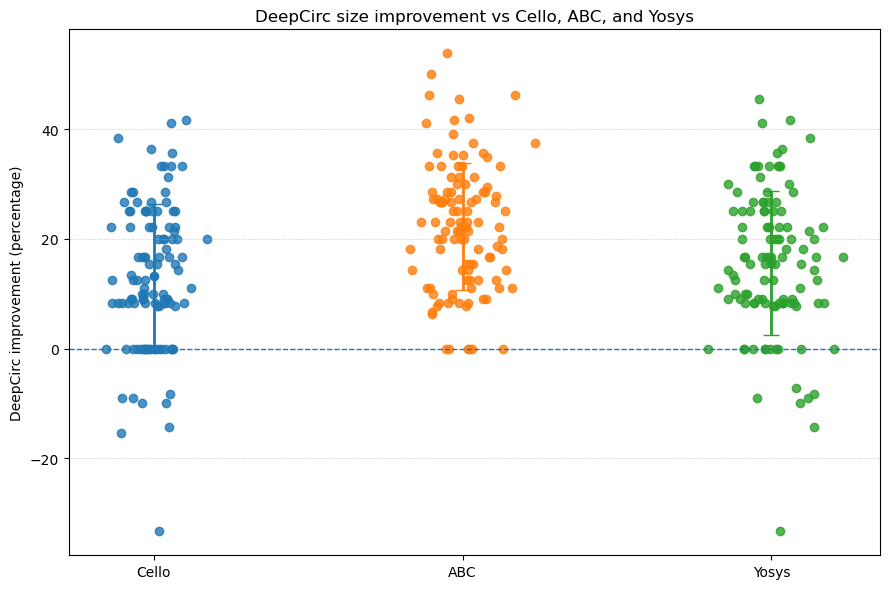

In [1]:
# Create a single scatter/strip plot with 3 columns (Cello, ABC, Yosys) showing
# DeepCirc percentage improvement. We'll jitter x a bit for visibility and add
# mean ± std bars per column. No seaborn; matplotlib only; no color specification.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

raw = """Circuit,DeepCirc,Cello2,Yosys,ABC
0x000D,7,7,7,7
0x0239,11,12,12,12
0x0304,8,10,10,9
0x040B,8,10,10,10
0x0575,5,5,5,5
0x057A,11,12,12,12
0x0643,11,13,13,17
0x0760,9,12,12,11
0x09AF,9,10,10,12
0x0F42,12,11,11,13
0x1038,7,9,9,8
0x1048,11,11,13,14
0x10C9,13,13,13,18
0x1284,10,15,15,14
0x1323,8,8,9,9
0x13CE,7,8,9,9
0x1714,9,10,10,10
0x1858,6,8,9,13
0x1A60,9,12,12,11
0x1AC6,14,18,18,23
0x1CBF,7,9,10,13
0x1D95,7,8,8,8
0x1FDE,11,12,12,14
0x226B,10,10,11,17
0x22C6,8,8,8,11
0x23A7,7,8,8,8
0x240F,10,11,12,11
0x2A38,8,10,10,9
0x2A56,10,11,11,16
0x2FC7,10,15,15,16
0x3060,8,10,10,10
0x30CE,9,10,10,11
0x32AA,5,5,5,5
0x35C3,11,12,12,15
0x36DC,10,12,12,11
0x3812,10,12,12,14
0x3A17,11,15,15,16
0x3B31,5,7,7,6
0x3B60,11,11,11,13
0x3B68,11,12,12,14
0x409B,9,14,14,14
0x41A2,10,11,11,13
0x41B2,11,11,12,16
0x429B,12,13,13,15
0x4724,12,13,13,14
0x47FD,12,9,9,13
0x48C1,12,13,13,17
0x4A32,10,12,12,13
0x4BF8,8,12,12,11
0x5215,11,12,12,12
0x53AF,8,12,12,11
0x53D7,7,9,9,13
0x599A,8,13,13,10
0x5AAD,9,12,12,14
0x5B30,11,10,15,15
0x5DA9,10,12,12,11
0x5F01,8,8,8,8
0x5FE2,8,9,12,11
0x616A,10,11,11,15
0x648B,12,14,14,12
0x6572,11,12,12,16
0x680A,11,12,12,15
0x6847,14,14,14,15
0x699D,11,16,16,22
0x6F2A,6,6,6,8
0x7096,12,16,16,15
0x70EC,7,7,8,9
0x7176,10,12,12,13
0x822B,11,13,13,13
0x850E,11,13,13,15
0x8F63,12,11,11,14
0x914C,9,9,9,10
0x918A,10,11,12,12
0x93AC,11,15,15,13
0x9591,6,8,9,9
0x96F7,10,17,17,13
0x9917,10,11,11,14
0x9BF5,8,10,10,12
0x9F8A,8,7,7,8
0xA2DA,12,16,16,16
0xA7B2,10,14,14,15
0xA960,11,15,15,17
0xB744,8,8,10,9
0xB8AD,10,12,12,13
0xBC16,11,15,15,15
0xBCA3,9,11,11,11
0xBDF1,9,10,11,12
0xBEE9,12,12,14,14
0xBF36,11,10,10,12
0xC248,11,12,12,15
0xC4B2,13,12,12,16
0xC766,7,11,11,10
0xCB82,10,11,11,13
0xCBD6,12,16,16,14
0xCE97,14,16,16,18
0xD319,11,12,12,15
0xD326,15,13,14,16
0xD477,6,8,8,9
0xD4E4,8,10,10,10
0xD550,5,7,7,7
0xDA80,8,9,9,9
0xDBFA,7,12,12,9
0xE605,10,12,12,14
0xE677,7,7,10,12
0xE93A,13,15,15,20
0xECF1,8,8,8,11
0xEFEB,7,9,9,8
0xF43F,6,8,11,11
0xF4E7,11,14,14,14
0xF5A4,7,9,9,10
0xFC79,11,12,12,19
"""

df = pd.read_csv(StringIO(raw))

# Compute % improvements
impr_cello = (df["Cello2"] - df["DeepCirc"]) / df["Cello2"] * 100
impr_abc   = (df["ABC"]    - df["DeepCirc"]) / df["ABC"]    * 100
impr_yosys = (df["Yosys"]  - df["DeepCirc"]) / df["Yosys"]  * 100

# Prepare a tidy array and meta to plot 3 columns with jitter
groups = ["Cello", "ABC", "Yosys"]
values = [impr_cello.values, impr_abc.values, impr_yosys.values]

rng = np.random.default_rng(42)
jitter_scale = 0.08

plt.figure(figsize=(9, 6))
for i, vals in enumerate(values):
    x = np.full_like(vals, i, dtype=float) + rng.normal(0, jitter_scale, size=len(vals))
    plt.scatter(x, vals, alpha=0.8)

    # mean ± std bars per group
    mean = np.mean(vals)
    std = np.std(vals, ddof=1)
    plt.errorbar([i], [mean], yerr=[std], fmt='o', capsize=6, linewidth=2)

# horizontal zero baseline
plt.axhline(0, linestyle="--", linewidth=1)

plt.xticks(range(len(groups)), groups)
plt.ylabel("DeepCirc improvement (percentage)")
plt.title("DeepCirc size improvement vs Cello, ABC, and Yosys")
plt.grid(True, axis="y", linestyle=":", linewidth=0.5)
plt.tight_layout()
#plt.savefig("/mnt/data/deepcirc_improvement_strip.png")
plt.show()


